In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchwisdom.vision.data.capsule import *
from torchwisdom.vision.trainer import *
from torchwisdom.core.callback import *
from torchwisdom.core.nn import functional as N
from torchwisdom.vision import models
import matplotlib.pyplot as plt

In [3]:
data = autoencoder_data('/data/carvana', feature_dir='train', target_dir='train_masks_png', 
                        split_dataset=True, valid_size=0.1, limit_size=50, limit_type=int)
# ae = AutoEncoderDataset('/data/carvana/', feature_dir='train', target_dir='train_masks_png')

In [4]:
feat, targ = next(iter(data.valid_loader))
feat.shape

torch.Size([5, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


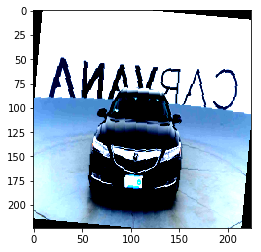

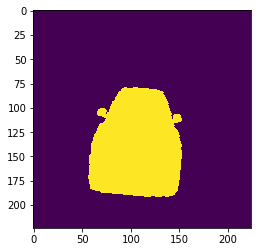

In [5]:
x,y = data.trainset.__getitem__(0)
plt.imshow(x.permute(1,2,0));plt.show()
plt.imshow(y.squeeze());

In [7]:
model = models.TuneableUNet(in_chan=3, n_classes=1, start_feat=8, deep=2)

In [8]:
trainer = AutoEncoderTrainer(data=data, model=model)
trainer.compile(optimizer=optim.Adam, criterion=nn.BCEWithLogitsLoss())
trainer.metrics = [DiceCoefCallback()]
trainer.resumeable(True)
trainer.save_best(True)

epoch,trn_loss,val_loss,trn_dice_loss,val_dice_loss,time,remain
1,1.318050,1.294054,0.437140,0.456042,0:00:03.94,0:00:15.76
2,0.974925,1.110079,0.767015,0.636549,0:00:04.19,0:00:12.82
3,0.685946,1.008817,1.014063,0.730431,0:00:04.41,0:00:09.52
4,0.452417,0.932762,1.193580,0.798553,0:00:04.50,0:00:05.48
5,0.244360,0.785735,1.341255,0.924440,0:00:04.54,0:00:01.13


/opt/anaconda3/envs/prodwork/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


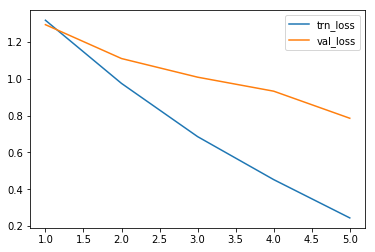

In [9]:
trainer.fit(5, lr=0.01)

In [12]:
feat, targ = next(iter(data.valid_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


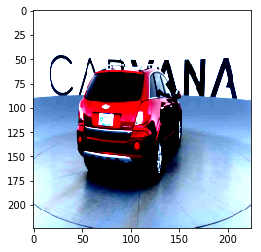

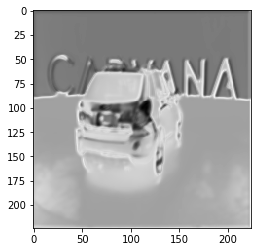

In [13]:
feat = feat[:1]
pred = trainer.predict(feat)

plt.imshow(feat.squeeze().permute(1,2,0));plt.show()
plt.imshow(pred.squeeze(), cmap='gray');plt.show()

In [40]:
trainer.export("export/carvana_export.pth")

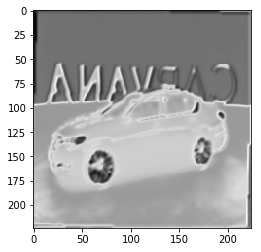

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


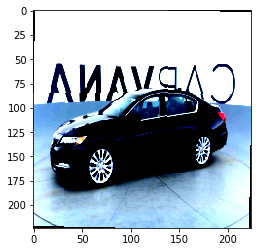

In [42]:
from torchwisdom.vision.data.capsule import *
from torchwisdom.vision.trainer import *
from torchwisdom.vision.predictor import *

data = autoencoder_data('/data/carvana', feature_dir='train', target_dir='train_masks_png', 
                        split_dataset=True, valid_size=0.1, limit_size=50, limit_type=int)
feat, targ = next(iter(data.train_loader))

predictor = ConvAutoEncoderPredictor("export/carvana_export.pth")
pred = predictor.predict(feat[:10])
plt.imshow(pred[0].squeeze(), cmap='gray');plt.show()
plt.imshow(feat[0].permute(1,2,0), cmap='gray')